In [1]:
import pandas as pd
import numpy as np

import os
import sys
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
import os.path
import IPython.display
import seaborn as sns
import librosa
import librosa.display
import soundfile

# to play the audio files
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Define the paths to the data directories
#BASER_DIR = Path('/kaggle/input/baser-dataset/BASER_DATASET')
SUBESCO_DIR = Path('C:\\Users\\Rajarshi Das\\Repo Behavioral Pattern Analysis\\Speech Features Extraction\\Input')


# data_path = list(BASER_DIR.glob('*.wav'))
filepaths = list(SUBESCO_DIR.glob('*.wav'))



In [5]:
filepaths[:10]

[WindowsPath('C:/Users/Rajarshi Das/Repo Behavioral Pattern Analysis/Speech Features Extraction/Input/F_01_OISHI_S_10_ANGRY_1.wav'),
 WindowsPath('C:/Users/Rajarshi Das/Repo Behavioral Pattern Analysis/Speech Features Extraction/Input/F_01_OISHI_S_10_ANGRY_2.wav'),
 WindowsPath('C:/Users/Rajarshi Das/Repo Behavioral Pattern Analysis/Speech Features Extraction/Input/F_01_OISHI_S_10_ANGRY_3.wav'),
 WindowsPath('C:/Users/Rajarshi Das/Repo Behavioral Pattern Analysis/Speech Features Extraction/Input/F_01_OISHI_S_10_ANGRY_4.wav'),
 WindowsPath('C:/Users/Rajarshi Das/Repo Behavioral Pattern Analysis/Speech Features Extraction/Input/F_01_OISHI_S_10_ANGRY_5.wav'),
 WindowsPath('C:/Users/Rajarshi Das/Repo Behavioral Pattern Analysis/Speech Features Extraction/Input/F_01_OISHI_S_10_DISGUST_1.wav'),
 WindowsPath('C:/Users/Rajarshi Das/Repo Behavioral Pattern Analysis/Speech Features Extraction/Input/F_01_OISHI_S_10_DISGUST_2.wav'),
 WindowsPath('C:/Users/Rajarshi Das/Repo Behavioral Pattern Analy

In [6]:
# identify emotions from the baser dataset
audio_files = [path.name for path in filepaths]


contributor_name = [item.split("_")[2] for item in audio_files]
emotion_label = [filename.split("_")[5] for filename in audio_files]

In [7]:
print(set(emotion_label))

{'DISGUST', 'NEUTRAL', 'SURPRISE', 'SAD', 'FEAR', 'ANGRY', 'HAPPY'}


In [8]:
# Total Number of Contributors and Types of emotions in the audio files
unique = set(contributor_name)
type_of_emotions = set(emotion_label)

print(f"There are total {len(unique)} numbers of people contributed in this dataset for {len(type_of_emotions)} different emotions")

There are total 20 numbers of people contributed in this dataset for 7 different emotions


In [9]:
# appending emotion_label for the audio dataframe
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
contributor_label = pd.Series(contributor_name, name='Contributor')
labels = pd.Series(emotion_label, name='Label')


audio_df = pd.concat([filepaths, contributor_label,  labels], axis=1)
audio_df['Index'] = audio_df.index
print(audio_df)

                                               Filepath Contributor     Label  \
0     C:\Users\Rajarshi Das\Repo Behavioral Pattern ...       OISHI     ANGRY   
1     C:\Users\Rajarshi Das\Repo Behavioral Pattern ...       OISHI     ANGRY   
2     C:\Users\Rajarshi Das\Repo Behavioral Pattern ...       OISHI     ANGRY   
3     C:\Users\Rajarshi Das\Repo Behavioral Pattern ...       OISHI     ANGRY   
4     C:\Users\Rajarshi Das\Repo Behavioral Pattern ...       OISHI     ANGRY   
...                                                 ...         ...       ...   
6995  C:\Users\Rajarshi Das\Repo Behavioral Pattern ...        EVAN  SURPRISE   
6996  C:\Users\Rajarshi Das\Repo Behavioral Pattern ...        EVAN  SURPRISE   
6997  C:\Users\Rajarshi Das\Repo Behavioral Pattern ...        EVAN  SURPRISE   
6998  C:\Users\Rajarshi Das\Repo Behavioral Pattern ...        EVAN  SURPRISE   
6999  C:\Users\Rajarshi Das\Repo Behavioral Pattern ...        EVAN  SURPRISE   

      Index  
0         0  

In [8]:
audio_df.head(5)

,Filepath,Contributor,Label,Index
0,C:\Users\Rajarshi Das\Repo Behavioral Pattern ...,OISHI,ANGRY,0
1,C:\Users\Rajarshi Das\Repo Behavioral Pattern ...,OISHI,ANGRY,1
2,C:\Users\Rajarshi Das\Repo Behavioral Pattern ...,OISHI,ANGRY,2
3,C:\Users\Rajarshi Das\Repo Behavioral Pattern ...,OISHI,ANGRY,3
4,C:\Users\Rajarshi Das\Repo Behavioral Pattern ...,OISHI,ANGRY,4


<AxesSubplot:xlabel='Label', ylabel='Count'>

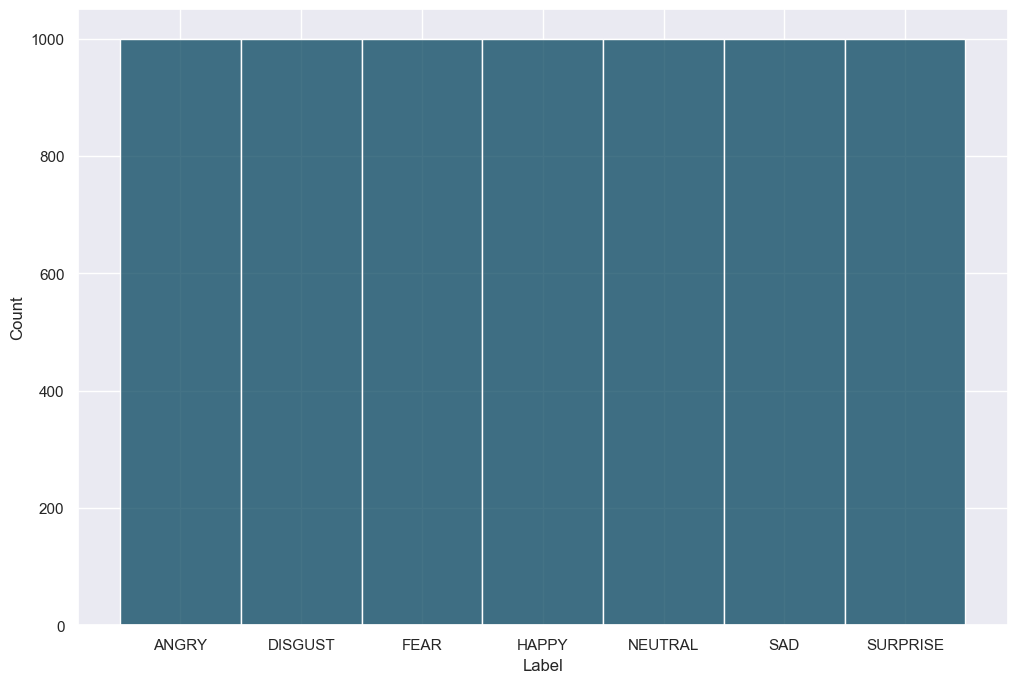

In [9]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('darkgrid')
sns.histplot(labels, color='#05445E')

In [10]:
# Assuming audio_df is already defined as shown in the provided code
# Select 5 samples for each emotion
samples_per_emotion = audio_df.groupby('Label').apply(lambda x: x.sample(5)).reset_index(drop=True)
samples_per_emotion


,Filepath,Contributor,Label,Index
0,C:\Users\Rajarshi Das\Repo Behavioral Pattern ...,SIBLY,ANGRY,5603
1,C:\Users\Rajarshi Das\Repo Behavioral Pattern ...,NIPUN,ANGRY,4167
2,C:\Users\Rajarshi Das\Repo Behavioral Pattern ...,SIBLY,ANGRY,5671
3,C:\Users\Rajarshi Das\Repo Behavioral Pattern ...,JOYEETA,ANGRY,2629
4,C:\Users\Rajarshi Das\Repo Behavioral Pattern ...,SHUKANTO,ANGRY,5499
5,C:\Users\Rajarshi Das\Repo Behavioral Pattern ...,SHUKANTO,DISGUST,5327
6,C:\Users\Rajarshi Das\Repo Behavioral Pattern ...,ILIAS,DISGUST,4383
7,C:\Users\Rajarshi Das\Repo Behavioral Pattern ...,TITHI,DISGUST,2144
8,C:\Users\Rajarshi Das\Repo Behavioral Pattern ...,JOYEETA,DISGUST,2701
9,C:\Users\Rajarshi Das\Repo Behavioral Pattern ...,ILIAS,DISGUST,4275


    Speech Rate  Voice Onset Rapidity    Jitter  Pitch Range  \
0    172.265625          2.079232e-09  0.050756  3832.572998   
1     78.302557          2.205027e-08  0.037669  3831.827148   
2    143.554688         -1.653770e-08  0.024655  3830.291016   
3     95.703125         -4.685683e-08  0.056835  3848.915283   
4    215.332031          4.629758e-04  0.031266  3839.812744   
5    184.570312          5.512568e-09  0.040216  3850.788086   
6    112.347147         -2.740443e-09  0.013058  3818.343750   
7    234.907670         -2.155196e-08  0.011911  3845.479004   
8    103.359375          5.512568e-09  0.028357  3848.253418   
9     92.285156          3.141025e-04  0.013139  3845.790771   
10   129.199219          0.000000e+00  0.022697  3844.891846   
11   135.999178         -1.089913e-08  0.008175  3837.257080   
12   198.768029          0.000000e+00  0.014749  3791.744629   
13    83.354335         -5.544618e-09  0.022218  3848.718262   
14    92.285156          1.791585e-08  0

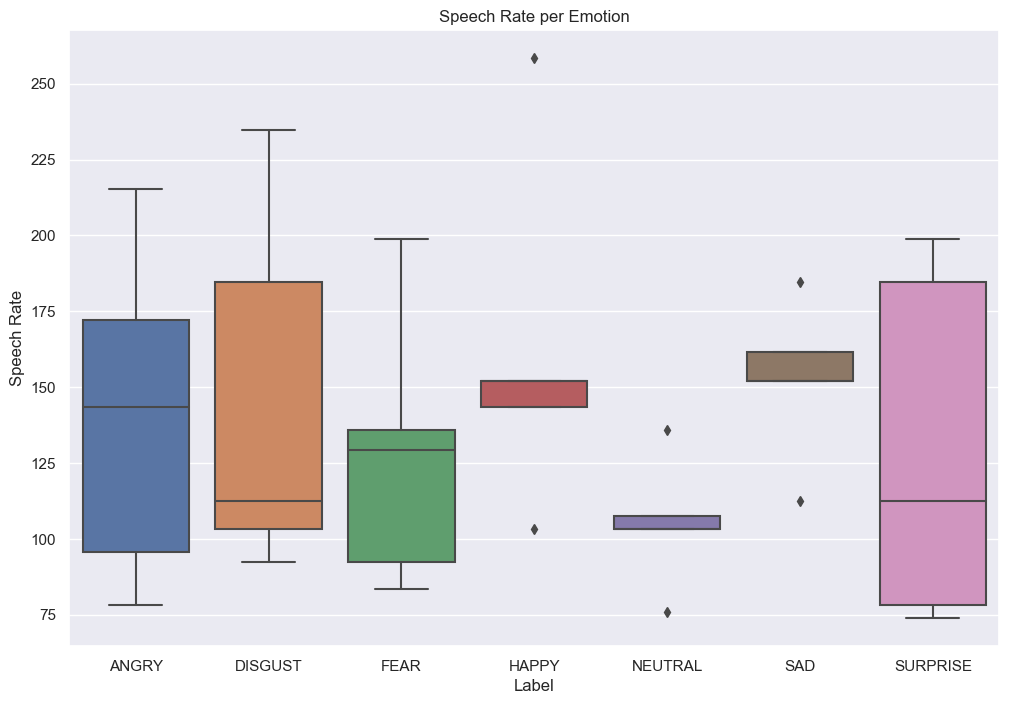

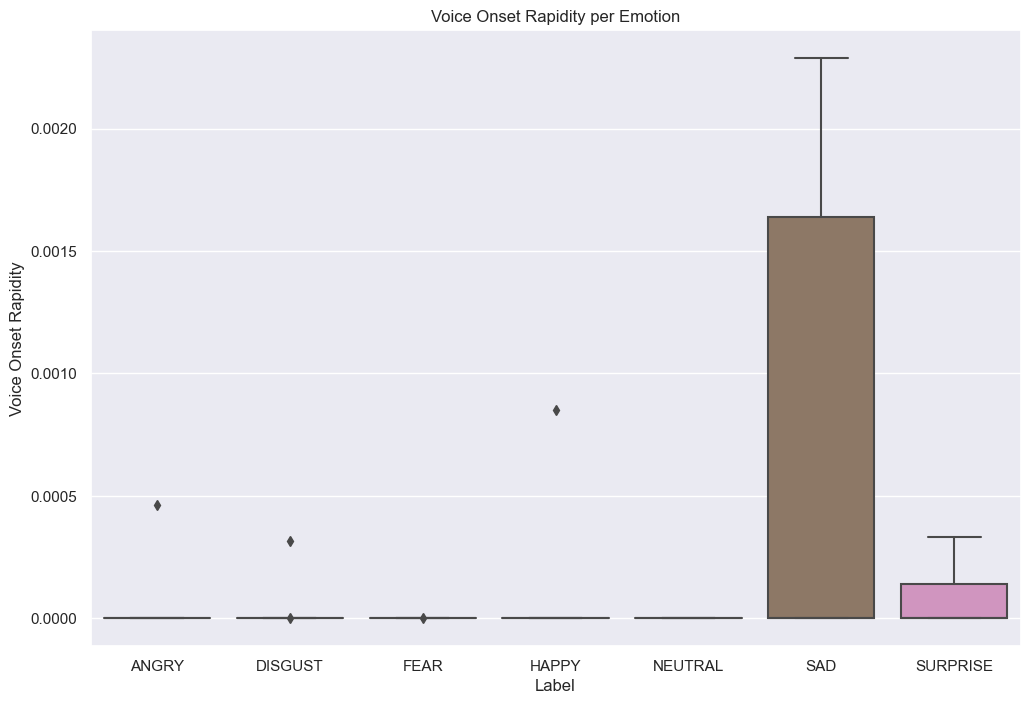

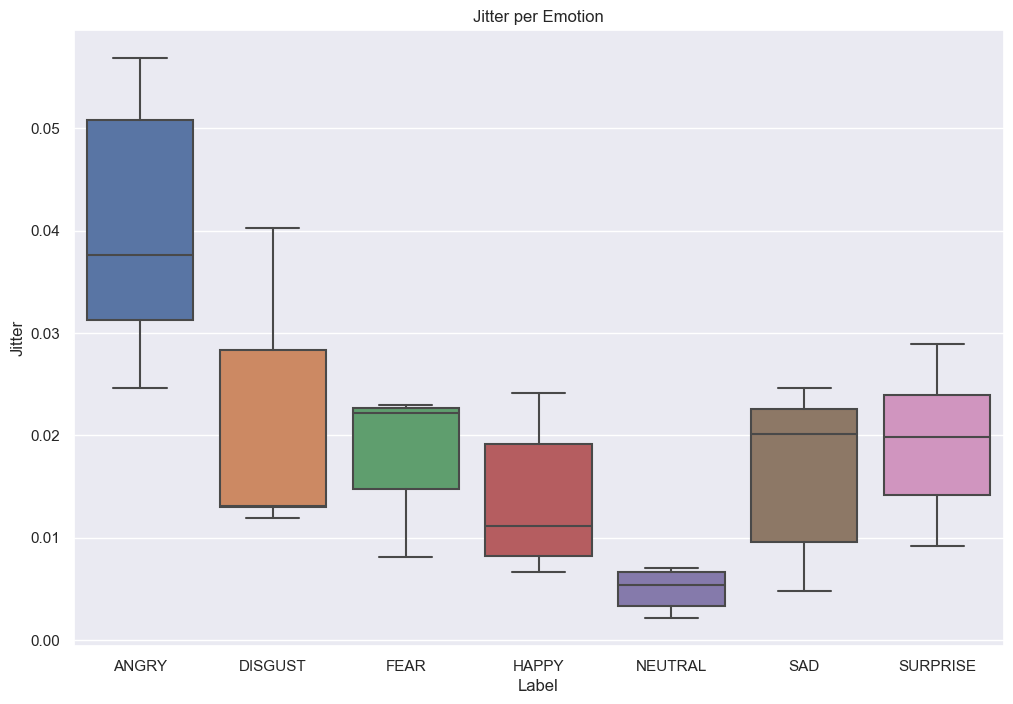

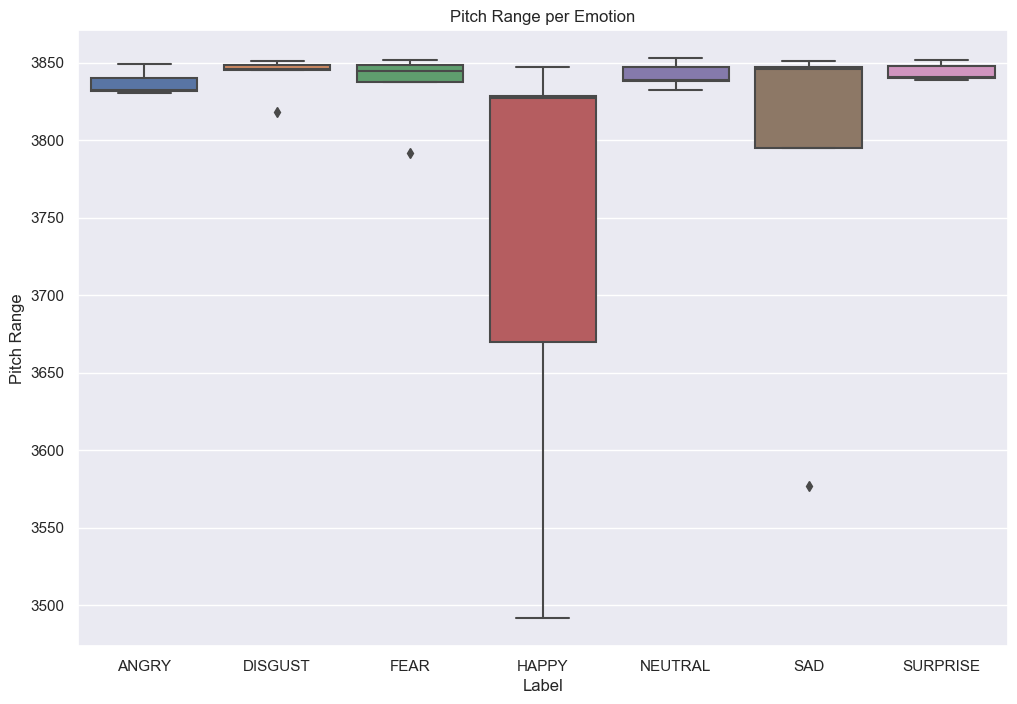

In [16]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal

# Patch scipy.signal.hann to redirect to scipy.signal.windows.hann
scipy.signal.hann = scipy.signal.windows.hann

# Function to extract features without numba
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    features = {}

    # Speech Rate (syllables/sec)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    features['Speech Rate'] = tempo

    # Voice Onset Rapidity (dB/sec2)
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    if len(onset_env) > 1:
        voice_onset_rapidity = np.diff(onset_env).mean()
    else:
        voice_onset_rapidity = 0
    features['Voice Onset Rapidity'] = voice_onset_rapidity

    # Jitter (dB/sample)
    jitter = np.abs(np.diff(y)).mean()
    features['Jitter'] = jitter

    # Pitch Range (Hz)
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_values = pitches[pitches > 0]
    if len(pitch_values) > 0:
        pitch_range = pitch_values.max() - pitch_values.min()
    else:
        pitch_range = 0
    features['Pitch Range'] = pitch_range

    return features

# Assuming audio_df is already defined as shown in the provided code
# Select 5 samples for each emotion
samples_per_emotion = audio_df.groupby('Label').apply(lambda x: x.sample(5)).reset_index(drop=True)

# Extract features for each sample
feature_list = []

for index, row in samples_per_emotion.iterrows():
    features = extract_features(row['Filepath'])
    features['Filepath'] = row['Filepath']
    features['Contributor'] = row['Contributor']
    features['Label'] = row['Label']
    feature_list.append(features)

# Create a DataFrame from the features
features_df = pd.DataFrame(feature_list)
print(features_df)

# Save the DataFrame to a CSV file
features_df.to_csv('extracted_features.csv', index=False)

# Visualize the process
plt.figure(figsize=(12, 8))
sns.boxplot(x='Label', y='Speech Rate', data=features_df)
plt.title('Speech Rate per Emotion')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Label', y='Voice Onset Rapidity', data=features_df)
plt.title('Voice Onset Rapidity per Emotion')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Label', y='Jitter', data=features_df)
plt.title('Jitter per Emotion')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Label', y='Pitch Range', data=features_df)
plt.title('Pitch Range per Emotion')
plt.show()


    Speech Rate  Voice Onset Rapidity    Jitter  Pitch Range  \
0    151.999081          3.100158e-04  0.050955  3846.322266   
1    234.907670          1.178231e-08  0.017503  3831.308594   
2    198.768029         -8.268852e-09  0.048617  3848.870850   
3    112.347147          1.495888e-03  0.027998  3853.087891   
4    184.570312         -1.378142e-08  0.022751  3852.279541   
5    129.199219          2.928552e-09  0.018205  3772.322510   
6    184.570312         -2.205027e-08  0.019106  3847.228271   
7    161.499023          2.693071e-03  0.027002  3843.427246   
8    151.999081         -1.653770e-08  0.010001  3849.970947   
9    143.554688          1.524770e-08  0.019874  3848.461426   
10   135.999178         -5.512568e-09  0.021038  3849.119141   
11   151.999081          0.000000e+00  0.009681  3853.640381   
12   184.570312         -5.512568e-09  0.018776  3837.798096   
13   151.999081          0.000000e+00  0.027953  3853.185791   
14   135.999178          1.060873e-03  0

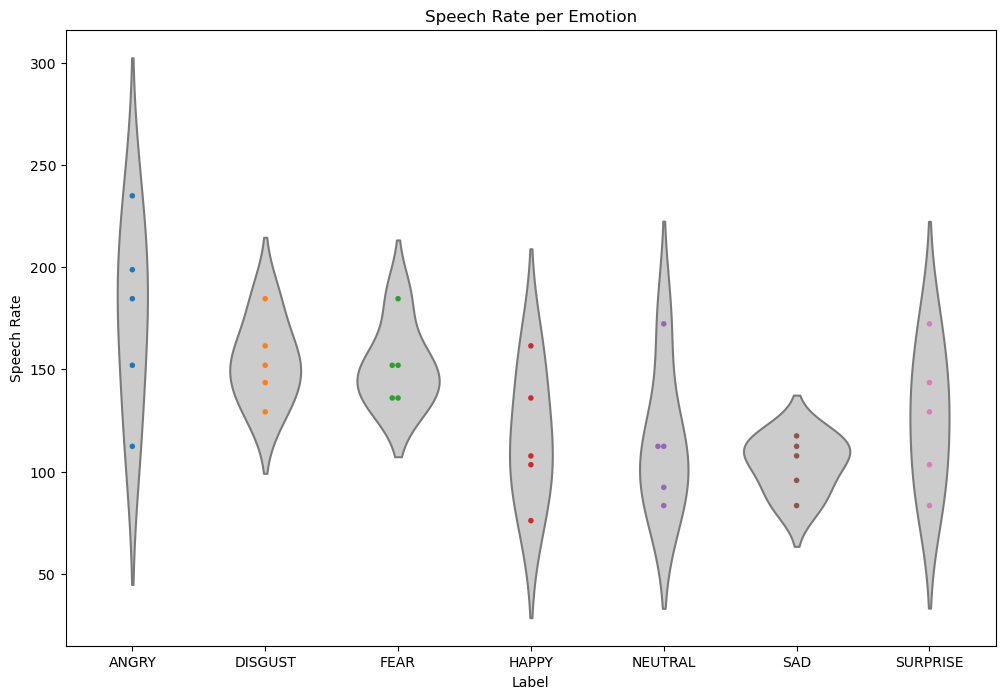

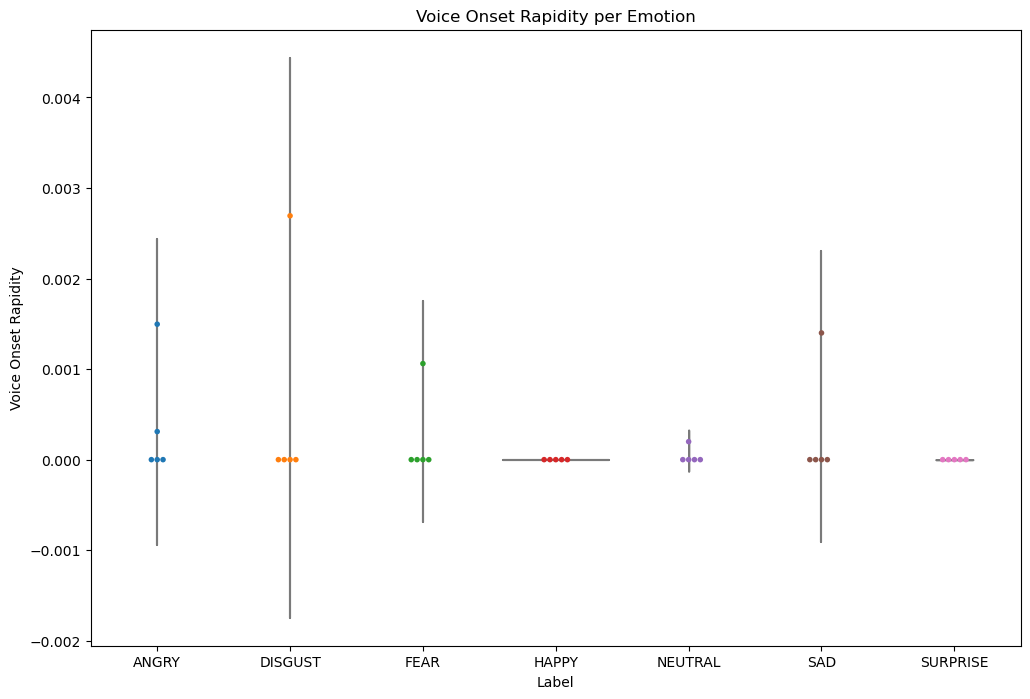

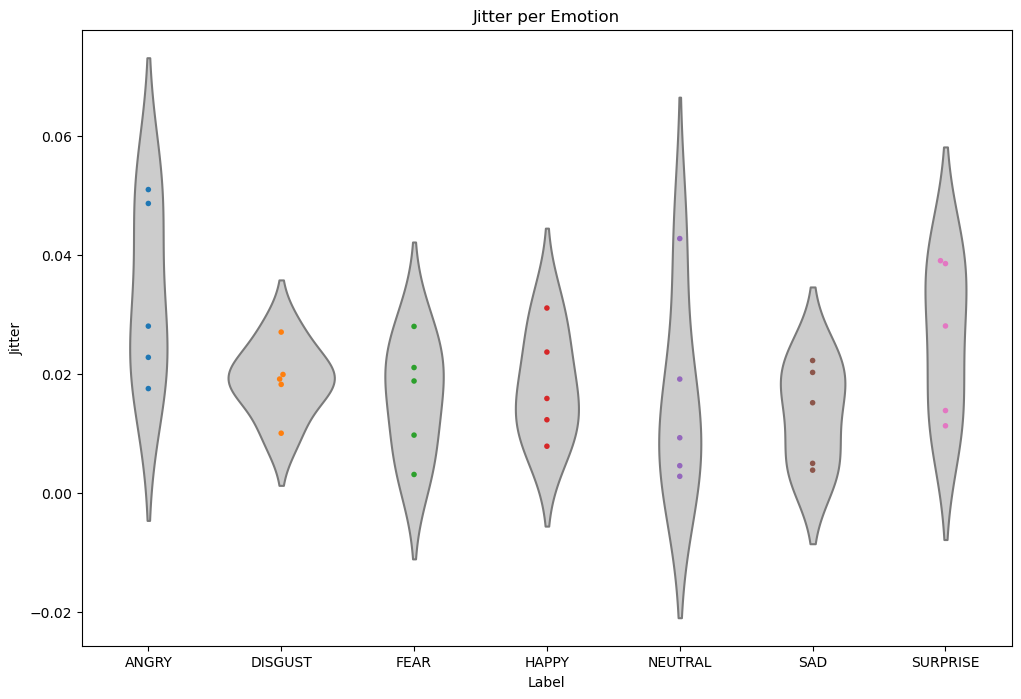

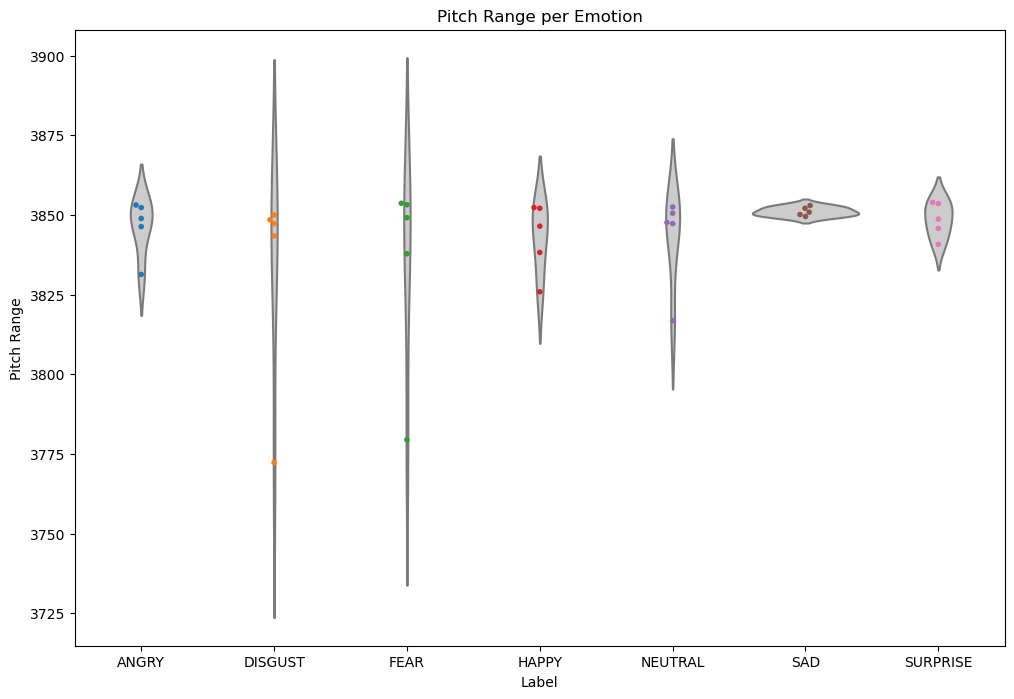

In [10]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal

# Patch scipy.signal.hann to redirect to scipy.signal.windows.hann
scipy.signal.hann = scipy.signal.windows.hann

# Function to extract features without numba
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    features = {}

    # Speech Rate (syllables/sec)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    features['Speech Rate'] = tempo

    # Voice Onset Rapidity (dB/sec2)
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    if len(onset_env) > 1:
        voice_onset_rapidity = np.diff(onset_env).mean()
    else:
        voice_onset_rapidity = 0
    features['Voice Onset Rapidity'] = voice_onset_rapidity

    # Jitter (dB/sample)
    jitter = np.abs(np.diff(y)).mean()
    features['Jitter'] = jitter

    # Pitch Range (Hz)
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_values = pitches[pitches > 0]
    if len(pitch_values) > 0:
        pitch_range = pitch_values.max() - pitch_values.min()
    else:
        pitch_range = 0
    features['Pitch Range'] = pitch_range

    return features

# Assuming audio_df is already defined as shown in the provided code
# Select 5 samples for each emotion
samples_per_emotion = audio_df.groupby('Label').apply(lambda x: x.sample(5)).reset_index(drop=True)

# Extract features for each sample
feature_list = []

for index, row in samples_per_emotion.iterrows():
    features = extract_features(row['Filepath'])
    features['Filepath'] = row['Filepath']
    features['Contributor'] = row['Contributor']
    features['Label'] = row['Label']
    feature_list.append(features)

# Create a DataFrame from the features
features_df = pd.DataFrame(feature_list)
print(features_df)

# Save the DataFrame to a CSV file
features_df.to_csv('extracted_features.csv', index=False)

# Visualize the process with different and most prominent visualization

# Speech Rate Visualization
plt.figure(figsize=(12, 8))
sns.violinplot(x='Label', y='Speech Rate', data=features_df, inner=None, color=".8")
sns.swarmplot(x='Label', y='Speech Rate', data=features_df, size=4)
plt.title('Speech Rate per Emotion')
plt.show()

# Voice Onset Rapidity Visualization
plt.figure(figsize=(12, 8))
sns.violinplot(x='Label', y='Voice Onset Rapidity', data=features_df, inner=None, color=".8")
sns.swarmplot(x='Label', y='Voice Onset Rapidity', data=features_df, size=4)
plt.title('Voice Onset Rapidity per Emotion')
plt.show()

# Jitter Visualization
plt.figure(figsize=(12, 8))
sns.violinplot(x='Label', y='Jitter', data=features_df, inner=None, color=".8")
sns.swarmplot(x='Label', y='Jitter', data=features_df, size=4)
plt.title('Jitter per Emotion')
plt.show()

# Pitch Range Visualization
plt.figure(figsize=(12, 8))
sns.violinplot(x='Label', y='Pitch Range', data=features_df, inner=None, color=".8")
sns.swarmplot(x='Label', y='Pitch Range', data=features_df, size=4)
plt.title('Pitch Range per Emotion')
plt.show()
